In [7]:
import torch
import numpy as np
from PIL import Image
from glob import glob

def get_img_id(path):
    return int(path.split(".")[0].split("_")[-1])

def load_img(path):
    img = Image.open(path)
    return torch.from_numpy(np.array(img)).float()/255

multisampled = {get_img_id(f):load_img(f) for f in glob("renders/multisampled_*.png")}
render_sh = {get_img_id(f):load_img(f) for f in glob("renders/render_sh_*.png")}
render_no_sh = {get_img_id(f):load_img(f) for f in glob("renders/render_no_sh_*.png")}
sh_mask = {get_img_id(f):load_img(f) for f in glob("renders/sh_mask_*.png")}

In [26]:
multisampled_d = {get_img_id(f):load_img(f)[:,:,0] for f in glob("renders_d/multisampled_*.png")}
render_sh_d = {get_img_id(f):load_img(f)[:,:,0] for f in glob("renders_d/render_sh_*.png")}
render_no_sh_d = {get_img_id(f):load_img(f)[:,:,0] for f in glob("renders_d/render_no_sh_*.png")}

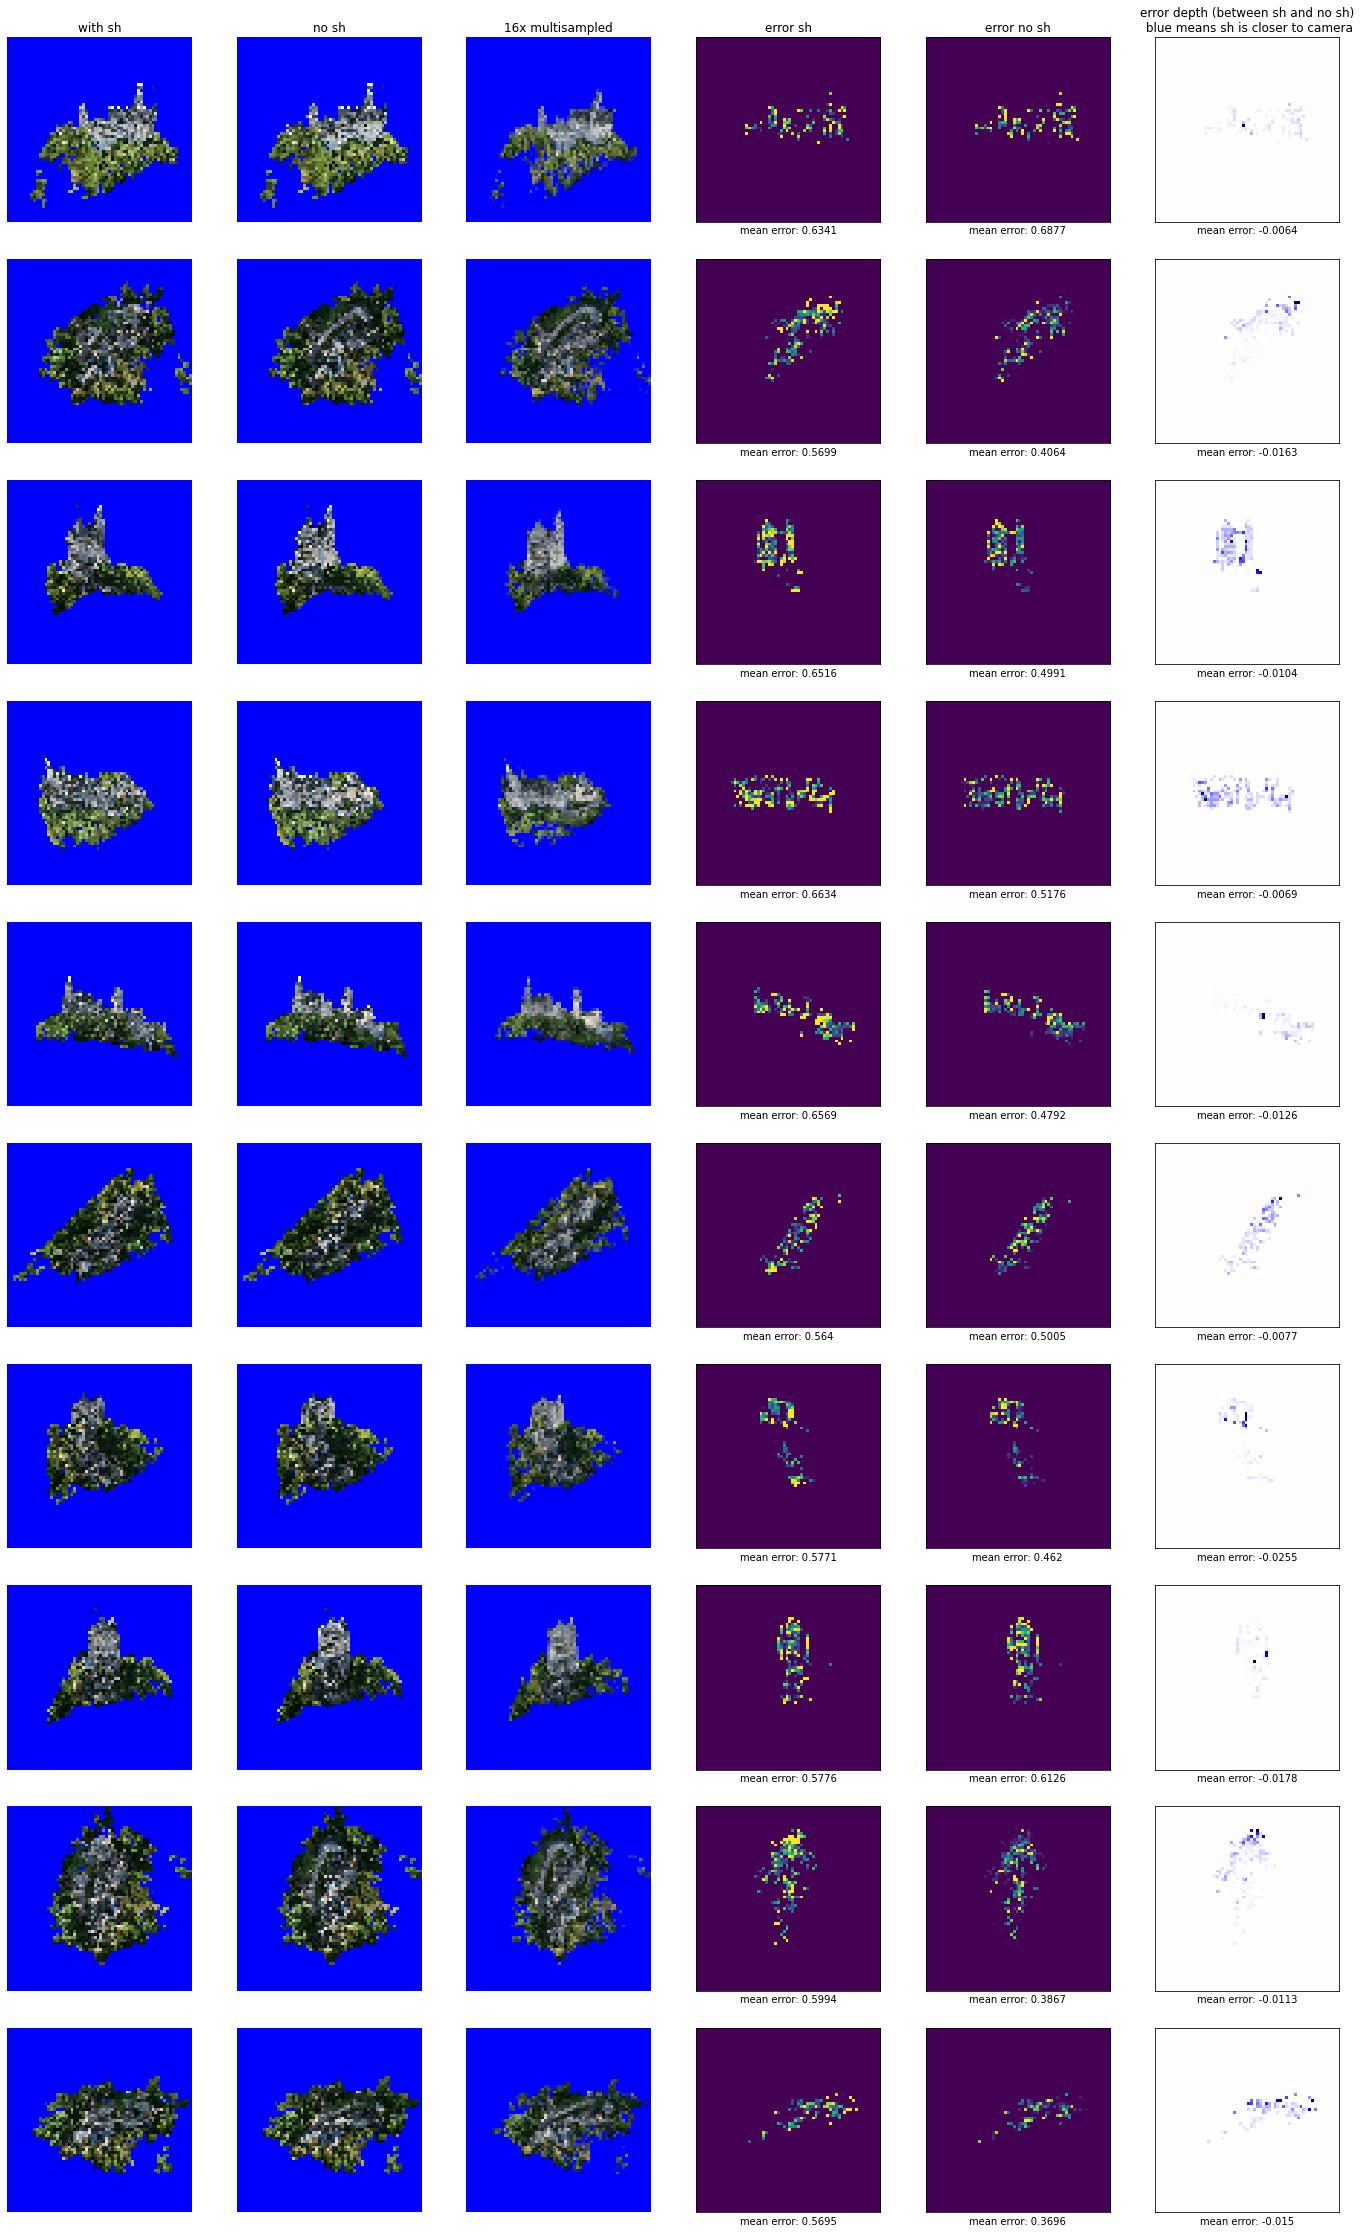

In [43]:
from matplotlib import pyplot as plt

scale = 4
fig,axes = plt.subplots(10,6,figsize=(6*scale,10*scale))

for i,(id,img_sh) in enumerate(list(render_sh.items())[:10]):
    img_no_sh = render_no_sh[id]
    mask_img = sh_mask[id]
    multi = multisampled[id]

    img_no_sh_d = render_no_sh_d[id]
    img_sh_d = render_sh_d[id]

    mask = (mask_img[:,:,0]==1.) & (mask_img[:,:,1]==0.) & (mask_img[:,:,2]==0.)
    
    error_sh = (img_sh-multi).norm(1,-1)
    error_sh[~mask] = 0

    error_no_sh = (img_no_sh-multi).norm(1,-1)
    error_no_sh[~mask] = 0


    error_d = img_no_sh_d-img_sh_d
    error_d[~mask] = 0

    (ax1,ax2,ax3,ax4,ax5,ax6) = axes[i]

    if i==0:
        ax1.set_title("with sh")
        ax2.set_title("no sh")
        ax3.set_title("16x multisampled")
        ax4.set_title("error sh")
        ax5.set_title("error no sh")
        ax6.set_title("error depth (between sh and no sh)\n blue means no sh is closer to camera")

    ax1.imshow(img_sh,interpolation="nearest")
    ax1.axis("off")

    ax2.imshow(img_no_sh,interpolation="nearest")
    ax2.axis("off")

    ax3.imshow(multi,interpolation="nearest")
    ax3.axis("off")
    
    ax4.imshow(error_sh,vmin=0,vmax=1,interpolation="nearest")
    ax4.axis("on")
    ax4.set_yticks([],[])
    ax4.set_xticks([],[])
    ax4.set_xlabel(f"mean error: {round(error_sh[mask].mean().item(),4)}")
    
    ax5.imshow(error_no_sh,vmin=0,vmax=1,interpolation="nearest")
    ax5.axis("on")
    ax5.set_yticks([],[])
    ax5.set_xticks([],[])
    ax5.set_xlabel(f"mean error: {round(error_no_sh[mask].mean().item(),4)}")

    vmax = error_d.abs().max()
    ax6.imshow(error_d,interpolation="nearest",cmap="seismic",vmin=-vmax,vmax=vmax)
    ax6.axis("on")
    ax6.set_yticks([],[])
    ax6.set_xticks([],[])
    ax6.set_xlabel(f"mean error: {round(error_d[mask].mean().item(),4)}")


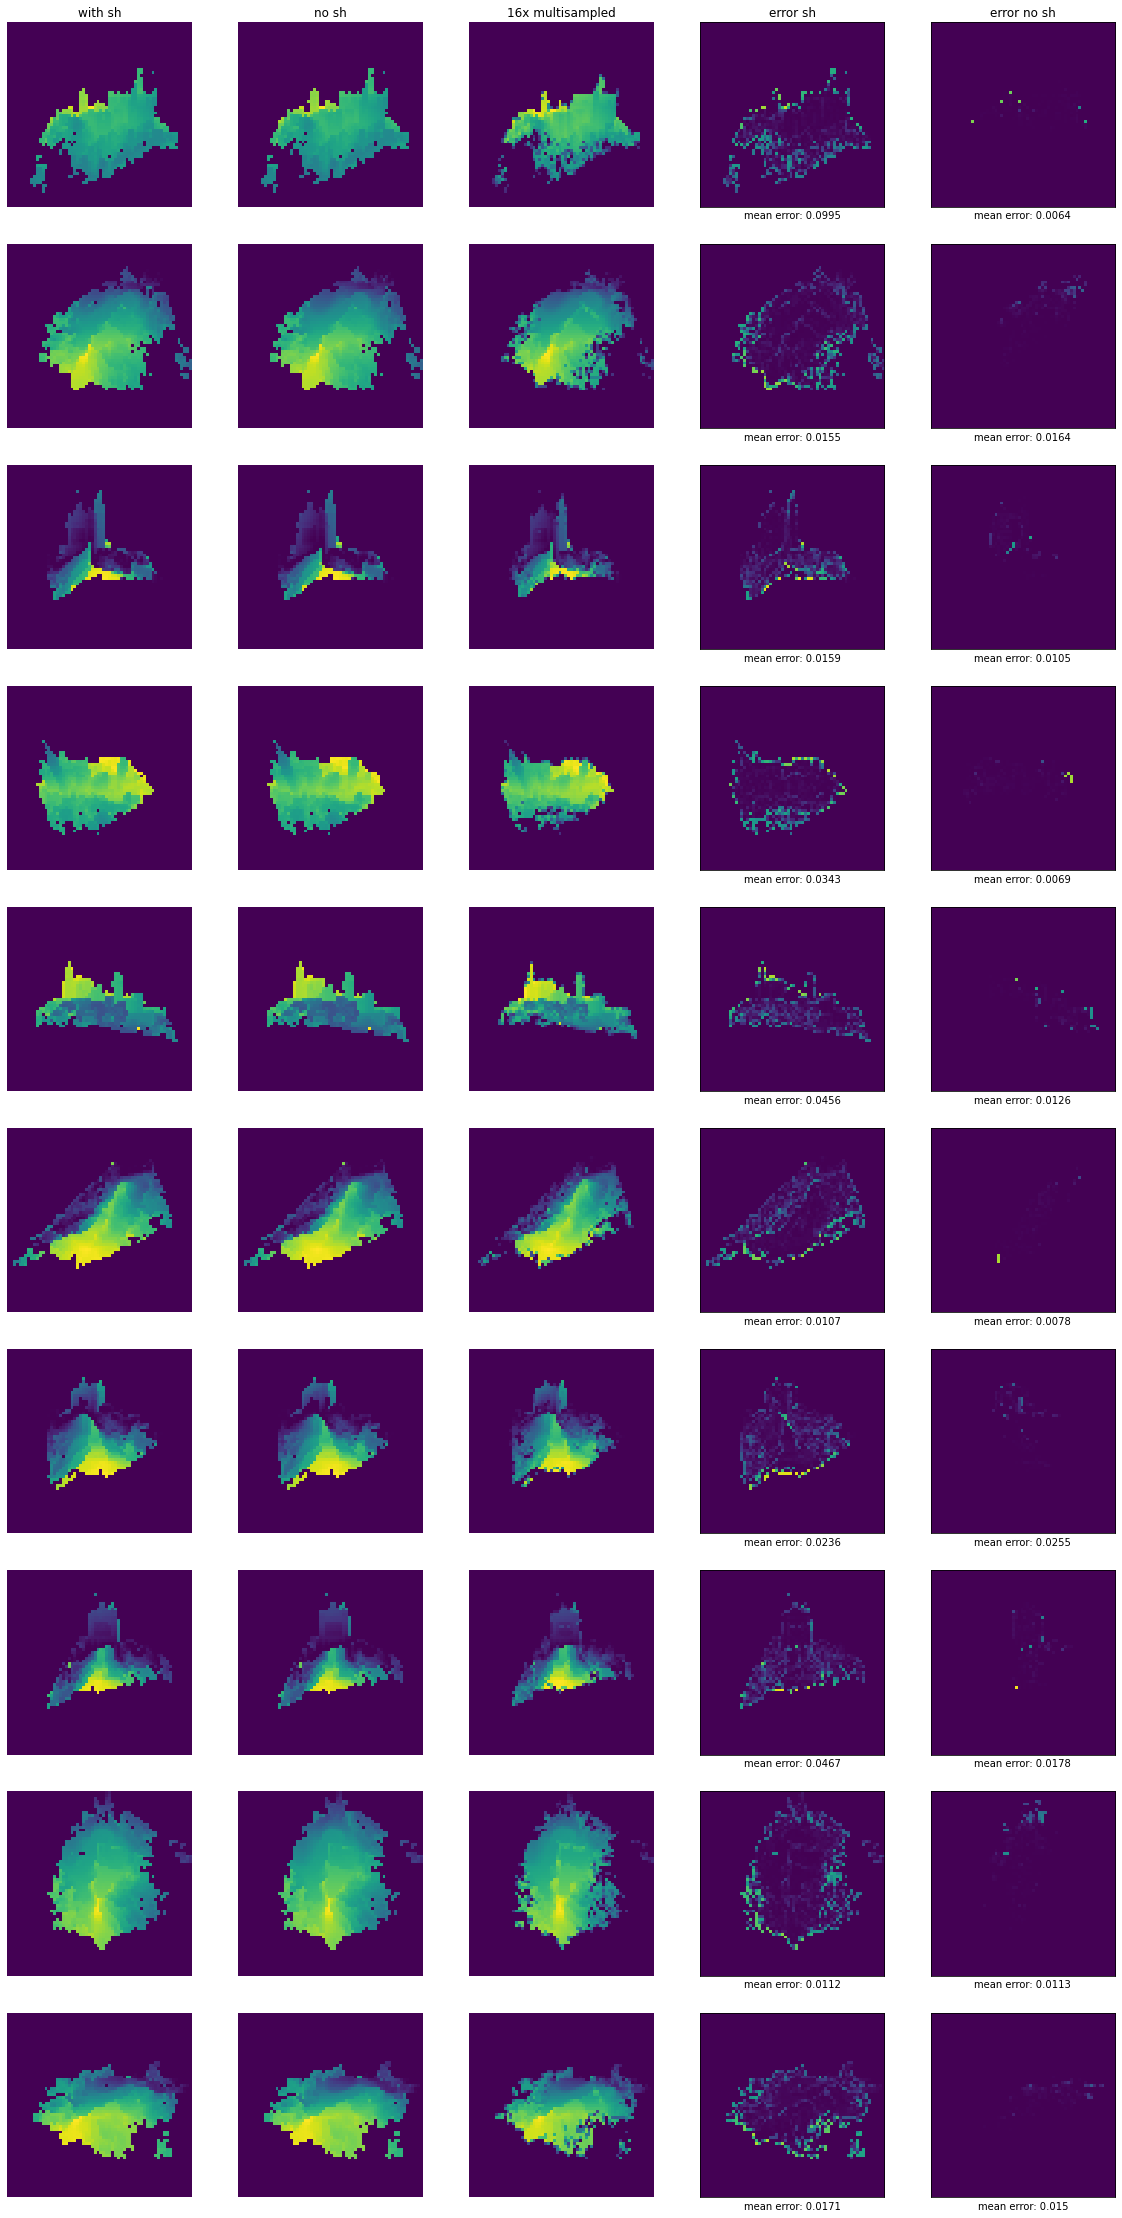

In [25]:
from matplotlib import pyplot as plt

scale = 4
fig,axes = plt.subplots(10,5,figsize=(5*scale,10*scale))

for i,(id,img_sh) in enumerate(list(render_sh_d.items())[:10]):
    img_no_sh = render_no_sh_d[id]
    mask_img = sh_mask[id]
    multi = multisampled_d[id]

    mask = (mask_img[:,:,0]==1.) & (mask_img[:,:,1]==0.) & (mask_img[:,:,2]==0.)
    
    error_sh = (img_sh-multi).abs()
    #error_sh[~mask] = 0

    error_no_sh = (img_no_sh-img_sh).abs()
    #error_no_sh[~mask] = 0

    (ax1,ax2,ax3,ax4,ax5) = axes[i]

    if i==0:
        ax1.set_title("with sh")
        ax2.set_title("no sh")
        ax3.set_title("16x multisampled")
        ax4.set_title("error sh")
        ax5.set_title("error no sh")

    ax1.imshow(img_sh,interpolation="nearest")
    ax1.axis("off")

    ax2.imshow(img_no_sh,interpolation="nearest")
    ax2.axis("off")

    ax3.imshow(multi,interpolation="nearest")
    ax3.axis("off")
    
    ax4.imshow(error_sh,vmin=0,vmax=1,interpolation="nearest")
    ax4.axis("on")
    ax4.set_yticks([],[])
    ax4.set_xticks([],[])
    ax4.set_xlabel(f"mean error: {round(error_sh[mask].mean().item(),4)}")
    
    ax5.imshow(error_no_sh,vmin=0,vmax=1,interpolation="nearest")
    ax5.axis("on")
    ax5.set_yticks([],[])
    ax5.set_xticks([],[])
    ax5.set_xlabel(f"mean error: {round(error_no_sh[mask].mean().item(),4)}")


In [ ]:
''